# Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from sklearn.metrics import mean_squared_error
# !pip install scikeras
# import scikeras

In [ ]:
data=pd.read_csv('drive/MyDrive/Colab Notebooks/data_72.csv',delimiter=',',parse_dates=True,index_col=0)
# y=(data.iloc[:,-2]-data.iloc[:,-1])#.values
y=data.iloc[:,-2:]
X=data.iloc[:,:-2]#.values

In [ ]:
y.std()

,0
sum(physicalFlow)0 inflow,1.822852e+06
sum(physicalFlow)1 outflow,2.214889e+06


In [ ]:
y.mean()

,0
sum(physicalFlow)0 inflow,7.247940e+06
sum(physicalFlow)1 outflow,7.140867e+06


In [ ]:
data

,WindGenForecast,WindGenForecast t-1,WindGenForecast t-2,WindGenForecast t-3,WindGenForecast t-4,WindGenForecast t-5,WindGenForecast t-6,WindGenForecast t-7,WindGenForecast t-8,WindGenForecast t-9,...,TotalLoadForecast t-64,TotalLoadForecast t-65,TotalLoadForecast t-66,TotalLoadForecast t-67,TotalLoadForecast t-68,TotalLoadForecast t-69,TotalLoadForecast t-70,TotalLoadForecast t-71,sum(physicalFlow)0 inflow,sum(physicalFlow)1 outflow
2018-08-02 04:00:00,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,250.0,...,7474.0,7744.0,7875.0,7712.0,7537.0,7291.0,6940.0,6359.0,5332486.0,4084033.0
2018-08-02 05:00:00,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,...,7267.0,7474.0,7744.0,7875.0,7712.0,7537.0,7291.0,6940.0,5425152.0,4611564.0
2018-08-02 06:00:00,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,...,7149.0,7267.0,7474.0,7744.0,7875.0,7712.0,7537.0,7291.0,5411656.0,5204580.0
2018-08-02 07:00:00,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,...,7026.0,7149.0,7267.0,7474.0,7744.0,7875.0,7712.0,7537.0,5792693.0,5379787.0
2018-08-02 08:00:00,580.0,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,...,6967.0,7026.0,7149.0,7267.0,7474.0,7744.0,7875.0,7712.0,5735920.0,5706807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 19:00:00,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,496.0,...,5134.0,5113.0,5256.0,5420.0,5529.0,6071.0,6695.0,7148.0,7602602.0,11077110.0
2022-01-31 20:00:00,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,...,5378.0,5134.0,5113.0,5256.0,5420.0,5529.0,6071.0,6695.0,7418126.0,10019737.0
2022-01-31 21:00:00,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,...,5828.0,5378.0,5134.0,5113.0,5256.0,5420.0,5529.0,6071.0,7407216.0,9476736.0
2022-01-31 22:00:00,1740.0,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,...,6411.0,5828.0,5378.0,5134.0,5113.0,5256.0,5420.0,5529.0,7398530.0,8326807.0


# Feature engineering

In [ ]:
f=lambda x: x.hour
ff=np.vectorize(f)
hour_of_day=ff(X.index.to_pydatetime())
X.loc[:, "hour"]=hour_of_day
X

<ipython-input-6-53c44885d1b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "hour"]=hour_of_day


,WindGenForecast,WindGenForecast t-1,WindGenForecast t-2,WindGenForecast t-3,WindGenForecast t-4,WindGenForecast t-5,WindGenForecast t-6,WindGenForecast t-7,WindGenForecast t-8,WindGenForecast t-9,...,TotalLoadForecast t-63,TotalLoadForecast t-64,TotalLoadForecast t-65,TotalLoadForecast t-66,TotalLoadForecast t-67,TotalLoadForecast t-68,TotalLoadForecast t-69,TotalLoadForecast t-70,TotalLoadForecast t-71,hour
2018-08-02 04:00:00,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,250.0,...,7267.0,7474.0,7744.0,7875.0,7712.0,7537.0,7291.0,6940.0,6359.0,4
2018-08-02 05:00:00,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,...,7149.0,7267.0,7474.0,7744.0,7875.0,7712.0,7537.0,7291.0,6940.0,5
2018-08-02 06:00:00,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,...,7026.0,7149.0,7267.0,7474.0,7744.0,7875.0,7712.0,7537.0,7291.0,6
2018-08-02 07:00:00,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,...,6967.0,7026.0,7149.0,7267.0,7474.0,7744.0,7875.0,7712.0,7537.0,7
2018-08-02 08:00:00,580.0,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,...,7111.0,6967.0,7026.0,7149.0,7267.0,7474.0,7744.0,7875.0,7712.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 19:00:00,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,496.0,...,5378.0,5134.0,5113.0,5256.0,5420.0,5529.0,6071.0,6695.0,7148.0,19
2022-01-31 20:00:00,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,...,5828.0,5378.0,5134.0,5113.0,5256.0,5420.0,5529.0,6071.0,6695.0,20
2022-01-31 21:00:00,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,...,6411.0,5828.0,5378.0,5134.0,5113.0,5256.0,5420.0,5529.0,6071.0,21
2022-01-31 22:00:00,1740.0,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,...,7138.0,6411.0,5828.0,5378.0,5134.0,5113.0,5256.0,5420.0,5529.0,22


# Split input data in 3 sets (train, validation, testing)

In [ ]:
# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
from sklearn.model_selection import train_test_split

train_ratio = 0.75 # training
validation_ratio = 0.15 # hyperparameter tuning
test_ratio = 0.10 # final evaluation

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=test_ratio,shuffle=False, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio/(1-test_ratio),shuffle=False, random_state=1)

# print('train percent',X_train.index.size/X.index.size)
# print('validation percent',X_val.index.size/X.index.size)
# print('test percent',X_test.index.size/X.index.size)
print('train percent',y_train.index.size/X.index.size, '\ttrain days',y_train.index.size/24 )
print('validation percent',y_val.index.size/X.index.size,'\tvalid days',y_val.index.size/24)
print('test percent',y_test.index.size/X.index.size,'\ttest days',y_test.index.size/24)
# print('train percent',y_train.size/X.size, '\ttrain days',y_train.index.size/24 )

train percent 0.75 	train days 858.125
validation percent 0.15 	valid days 171.625
test percent 0.1 	test days 114.41666666666667


In [ ]:
train_idx=X_train.index
val_idx=X_val.index
test_idx=X_test.index
test_idx

DatetimeIndex(['2021-10-09 03:00:00', '2021-10-09 04:00:00',
               '2021-10-09 05:00:00', '2021-10-09 06:00:00',
               '2021-10-09 07:00:00', '2021-10-09 08:00:00',
               '2021-10-09 09:00:00', '2021-10-09 10:00:00',
               '2021-10-09 11:00:00', '2021-10-09 12:00:00',
               ...
               '2022-01-31 14:00:00', '2022-01-31 15:00:00',
               '2022-01-31 16:00:00', '2022-01-31 17:00:00',
               '2022-01-31 18:00:00', '2022-01-31 19:00:00',
               '2022-01-31 20:00:00', '2022-01-31 21:00:00',
               '2022-01-31 22:00:00', '2022-01-31 23:00:00'],
              dtype='datetime64[ns]', length=2746, freq=None)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


X_train=sc.fit_transform(X_train)
X_val=sc.transform(X_val)
X_test=sc.transform(X_test)

In [ ]:
# from sklearn.utils import shuffle
# X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

In [ ]:
X_train

array([[-0.7200577 , -0.79305999, -0.86607461, ...,  1.02037904,
         0.5081157 , -1.08423612],
       [-0.62902742, -0.72024081, -0.79326061, ...,  1.32966164,
         1.0201525 , -0.93979521],
       [-0.57440925, -0.62921682, -0.72044661, ...,  1.54642381,
         1.3294897 , -0.7953543 ],
       ...,
       [-0.15931117, -0.14861019, -0.07604272, ..., -0.14097272,
         0.15471337, -0.36203156],
       [-0.08102513, -0.15953307, -0.14885672, ..., -0.35685374,
        -0.1414043 , -0.21759064],
       [ 0.05369969, -0.08125244, -0.15977882, ..., -0.53308314,
        -0.35732343, -0.07314973]])

# Training neural networks

## hidden layers: 16-16

### 1 model creation + training process

In [ ]:
%%time
model_name='16-16'
def new_nn():
  ann=tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
  ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
  ann.add(tf.keras.layers.Dense(units=2,activation='linear'))
  ann.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
  return ann

earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',start_from_epoch=5, patience=2500,restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath='{epoch:02d}-8-8-72.keras',save_freq='epoch')# wrong naming

new=new_nn()
history=new.fit(X_train,y_train,epochs=3000,validation_data=(X_val,y_val),callbacks=[earlyStop,modelCheckpoint],verbose=2)


Streaming output truncated to the last 5000 lines.
Epoch 502/3000
644/644 - 1s - 2ms/step - loss: 1514090135552.0000 - mean_absolute_percentage_error: 15.2038 - val_loss: 2487342333952.0000 - val_mean_absolute_percentage_error: 16.8204
Epoch 503/3000
644/644 - 3s - 4ms/step - loss: 1513833496576.0000 - mean_absolute_percentage_error: 15.2118 - val_loss: 2484114292736.0000 - val_mean_absolute_percentage_error: 16.8058
Epoch 504/3000
644/644 - 2s - 4ms/step - loss: 1513597304832.0000 - mean_absolute_percentage_error: 15.2112 - val_loss: 2494114299904.0000 - val_mean_absolute_percentage_error: 16.8408
Epoch 505/3000
644/644 - 2s - 4ms/step - loss: 1513337126912.0000 - mean_absolute_percentage_error: 15.2141 - val_loss: 2505759784960.0000 - val_mean_absolute_percentage_error: 16.8791
Epoch 506/3000
644/644 - 2s - 3ms/step - loss: 1512954789888.0000 - mean_absolute_percentage_error: 15.1917 - val_loss: 2489898500096.0000 - val_mean_absolute_percentage_error: 16.8263
Epoch 507/3000
644/644 -

In [ ]:
new.save('model/model'+model_name+' '+str(data.columns.size-2)+'.keras')  # The file needs to end with the .keras extension
# uncomment to load
# new = tf.keras.models.load_model('model16-16 216.keras')
from sklearn.metrics import mean_squared_error
print(mean_squared_error(new.predict(X_train),y_train))
print(mean_squared_error(new.predict(X_val),y_val))

644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1270742777856.0
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
2128658563072.0


### 2 Plots: mse loss and cross-validation loss

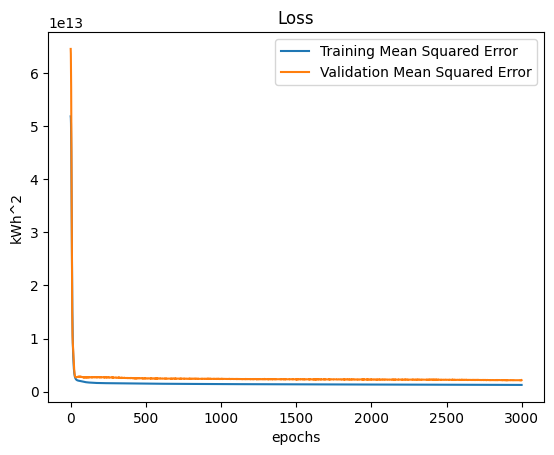

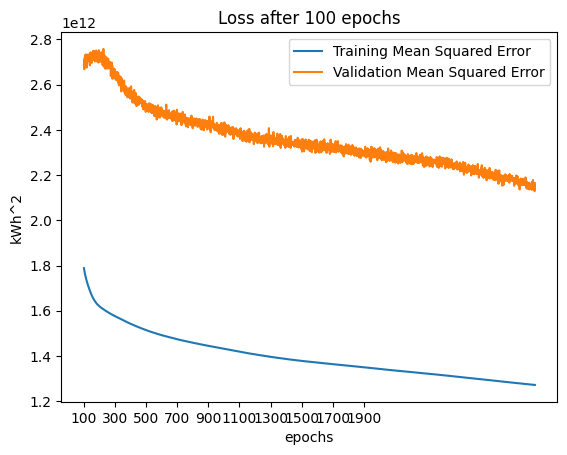

In [ ]:
line1=plt.plot(history.history['loss'],label='Training Mean Squared Error')
line2=plt.plot(history.history['val_loss'],label='Validation Mean Squared Error')
plt.legend()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('kWh^2')
plt.show()
line1=plt.plot(history.history['loss'][100:],label='Training Mean Squared Error')
line2=plt.plot(history.history['val_loss'][100:],label='Validation Mean Squared Error')
plt.xticks( list(range(0,2000,200)), list(range(100,2000,200)))
list(range(len(line1)))
plt.legend()
plt.title('Loss after 100 epochs')
plt.xlabel('epochs')
plt.ylabel('kWh^2')
plt.show()

### 3 Qualitative Plots

In [ ]:
start_train=train_idx[0]
end_train=train_idx[15*24]
print(start_train)

start_val=val_idx[0]
end_val=val_idx[15*24]
print(start_val)

start_test=test_idx[45*24]
end_test=test_idx[45*24+15*24]
print(start_test)

2018-08-02 04:00:00
2021-04-20 12:00:00
2021-11-23 04:00:00


In [ ]:
y_train_prediction=new.predict(X_train)
y_val_prediction=new.predict(X_val)

644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
a=pd.DataFrame(y_train).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
a['prediction gas inflow']=y_train_prediction[:,0]
a['prediction gas outflow']=y_train_prediction[:,1]
# a.round()
# a['2018-10':'2018-10-10'].plot()

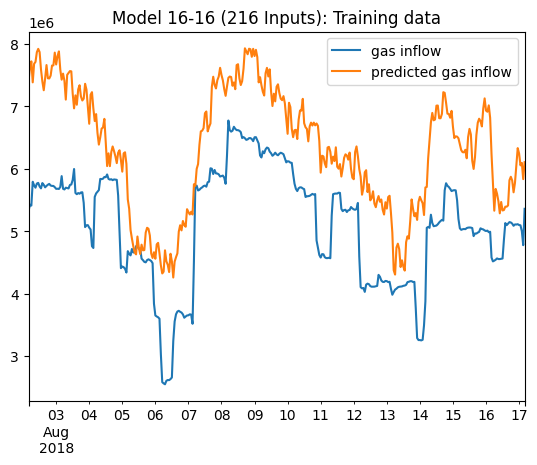

In [ ]:
a[start_train:end_train]['gas inflow'].plot()
a[start_train:end_train]['prediction gas inflow'].plot()
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Training data')
plt.legend(["gas inflow", "predicted gas inflow"])

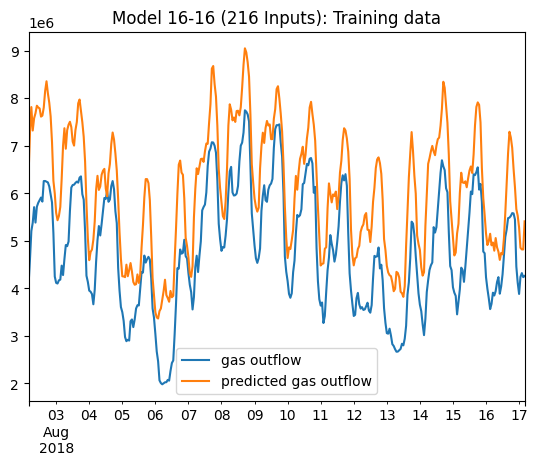

In [ ]:
a[start_train:end_train]['gas outflow'].plot()
a[start_train:end_train]['prediction gas outflow'].plot()
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Training data')
plt.legend(["gas outflow", "predicted gas outflow"])

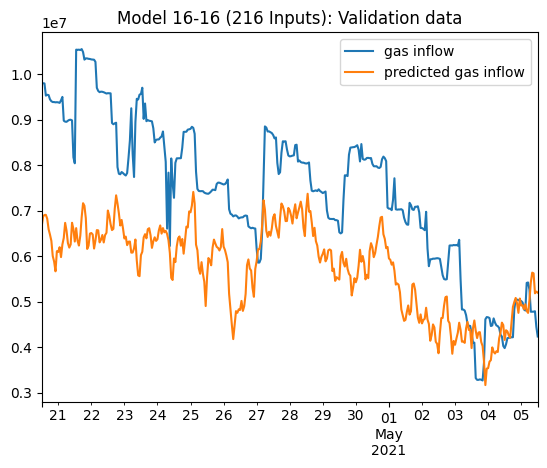

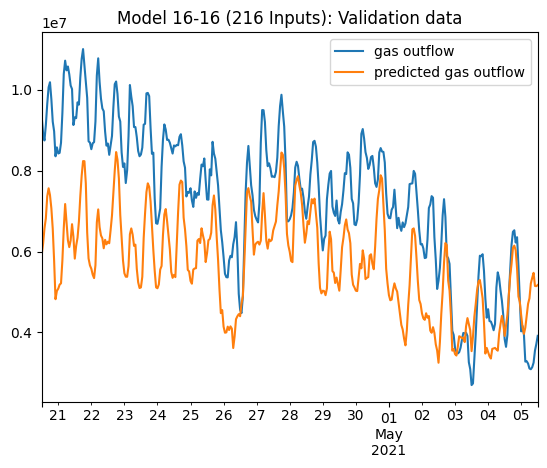

In [ ]:
b=pd.DataFrame(y_val).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_val_prediction[:,0]
b['prediction gas outflow']=y_val_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_val:end_val]['gas inflow'].plot()
b[start_val:end_val]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Validation data')
plt.show()

b[start_val:end_val]['gas outflow'].plot()
b[start_val:end_val]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Validation data')
plt.show()

## --

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
mse_test:  2106577780736.0
mse test inflow  2062073404258.282
mse test outflow  2151081845511.64
mape_test:  0.14839203655719757
mape test inflow  0.1404736007050771
mape test outflow  0.15631055086965592


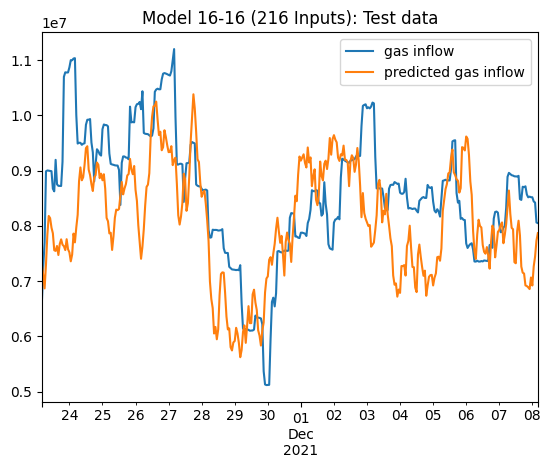

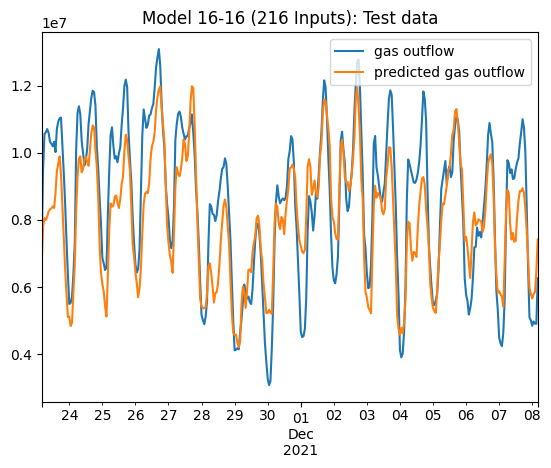

In [ ]:
y_TEST_prediction=new.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error
print('mse_test: ',mean_squared_error(y_test,y_TEST_prediction))

mse_test_inflow=mean_squared_error(y_test['sum(physicalFlow)0 inflow'],y_TEST_prediction[:,0])
mse_test_outflow=mean_squared_error(y_test['sum(physicalFlow)1 outflow'],y_TEST_prediction[:,1])

print('mse test inflow ',mse_test_inflow)
print('mse test outflow ',mse_test_outflow)

mape_test_inflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)0 inflow'],y_TEST_prediction[:,0])
mape_test_outflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)1 outflow'],y_TEST_prediction[:,1])

print('mape_test: ',mean_absolute_percentage_error(y_test,y_TEST_prediction))

print('mape test inflow ',mape_test_inflow)
print('mape test outflow ',mape_test_outflow)

b=pd.DataFrame(y_test).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_TEST_prediction[:,0]
b['prediction gas outflow']=y_TEST_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_test:end_test]['gas inflow'].plot()
b[start_test:end_test]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Test data')
plt.show()

b[start_test:end_test]['gas outflow'].plot()
b[start_test:end_test]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Test data')
plt.show()

mse_train:  1793702051675.3743
mse_val:  3330732577929.2163
mse_test:  2607607538303.384
mape_train:  0.16635462218807623
mape_val:  0.19368761447921723
mape_test:  0.149674046388592
mape test inflow  0.1454728436252514
mape test outflow  0.15387524915193226


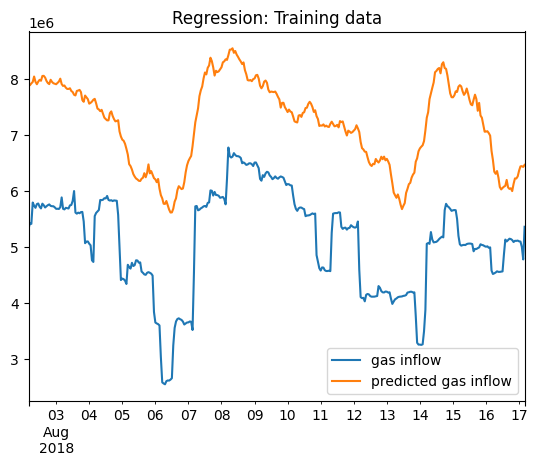

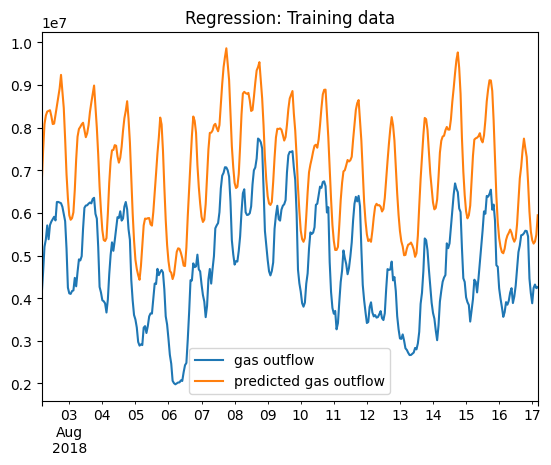

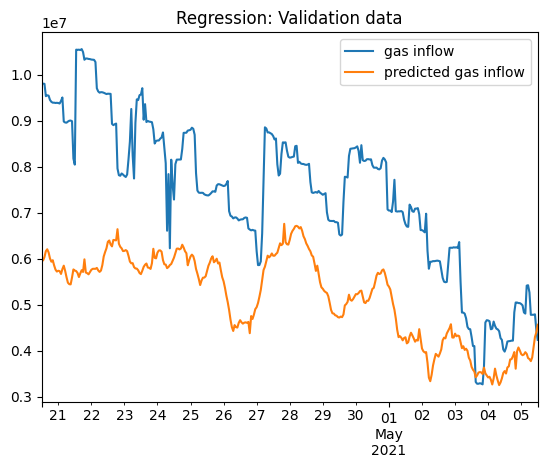

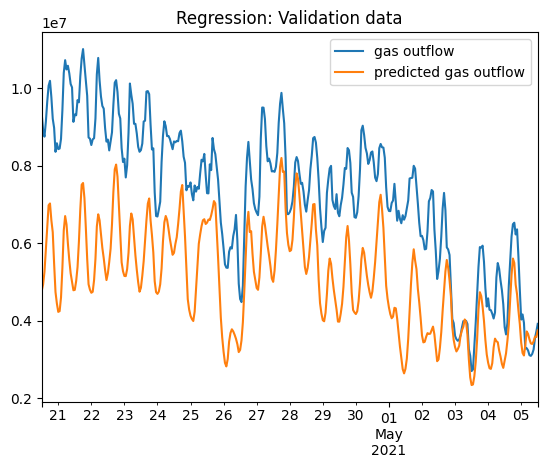

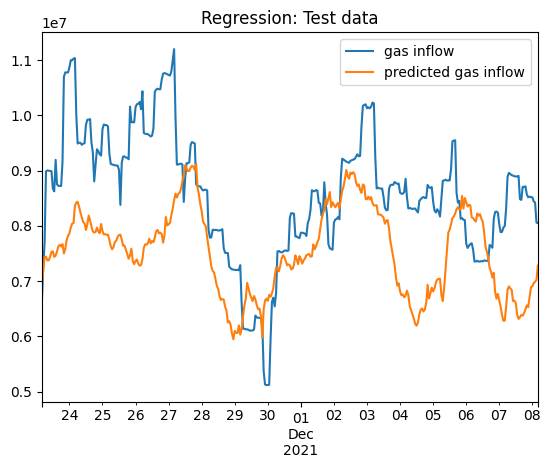

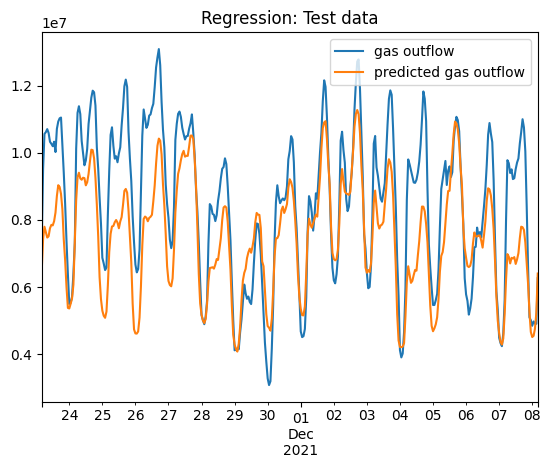

In [ ]:
X_total_train=np.append(X_train,values=X_val,axis=0)
y_total_train=np.append(y_train,values=y_val,axis=0)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_train_prediction=regressor.predict(X_train)
y_val_prediction=regressor.predict(X_val)
y_TEST_prediction=regressor.predict(X_test)

mape_test_inflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)0 inflow'],y_TEST_prediction[:,0])
mape_test_outflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)1 outflow'],y_TEST_prediction[:,1])

print('mse_train: ',mean_squared_error(y_train,y_train_prediction))
print('mse_val: ',mean_squared_error(y_val,y_val_prediction))
print('mse_test: ',mean_squared_error(y_test,y_TEST_prediction))

print('mape_train: ',mean_absolute_percentage_error(y_train,y_train_prediction))
print('mape_val: ',mean_absolute_percentage_error(y_val,y_val_prediction))
print('mape_test: ',mean_absolute_percentage_error(y_test,y_TEST_prediction))


print('mape test inflow ',mape_test_inflow)
print('mape test outflow ',mape_test_outflow)
## train
a=pd.DataFrame(y_train).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
a['prediction gas inflow']=y_train_prediction[:,0]
a['prediction gas outflow']=y_train_prediction[:,1]
# a.round()
# a['2018-10':'2018-10-10'].plot()
a[start_train:end_train]['gas inflow'].plot()
a[start_train:end_train]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Regression: Training data')
plt.show()
a[start_train:end_train]['gas outflow'].plot()
a[start_train:end_train]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Regression: Training data')
plt.show()
## val
b=pd.DataFrame(y_val).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_val_prediction[:,0]
b['prediction gas outflow']=y_val_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_val:end_val]['gas inflow'].plot()
b[start_val:end_val]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Regression: Validation data')
plt.show()

b[start_val:end_val]['gas outflow'].plot()
b[start_val:end_val]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Regression: Validation data')
plt.show()

b=pd.DataFrame(y_val).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_val_prediction[:,0]
b['prediction gas outflow']=y_val_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

## test
b=pd.DataFrame(y_test).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_TEST_prediction[:,0]
b['prediction gas outflow']=y_TEST_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_test:end_test]['gas inflow'].plot()
b[start_test:end_test]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Regression: Test data')
plt.show()

b[start_test:end_test]['gas outflow'].plot()
b[start_test:end_test]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Regression: Test data')
plt.show()

# print('mape test inflow 2022 6 ',mean_absolute_percentage_error(y_test['2022-6-20':'2022-6']['sum(physicalFlow)0 inflow'],pd.DataFrame(y_TEST_prediction,index=test_idx)['2022-6-20':'2022-6'][0]))

# b['2022-6':'2022-6']['gas outflow'].plot()
# b['2022-6':'2022-6']['prediction gas outflow'].plot()
# plt.legend(["gas outflow", "predicted gas outflow"])
# plt.title('Test data')